In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


plt.style.use('ggplot')

In [2]:
df = pd.read_csv("Agrofood_co2_emission.csv")
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [3]:
numerical_cols = df.select_dtypes(include='float64').columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
categorical_cols = ['Area']
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [4]:
df.isnull().sum()

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Food Transport                     0
Forestland                         0
Net Forest conversion              0
Food Household Consumption         0
Food Retail                        0
On-farm Electricity Use            0
Food Packaging                     0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
IPPU                               0
Manure applied to Soils            0
Manure left on Pasture             0
Manure Management                  0
Fires in organic soils             0
Fires in humid tropical forests    0
On-farm energy use                 0
Rural population                   0
Urban population                   0
T

In [5]:
df.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')

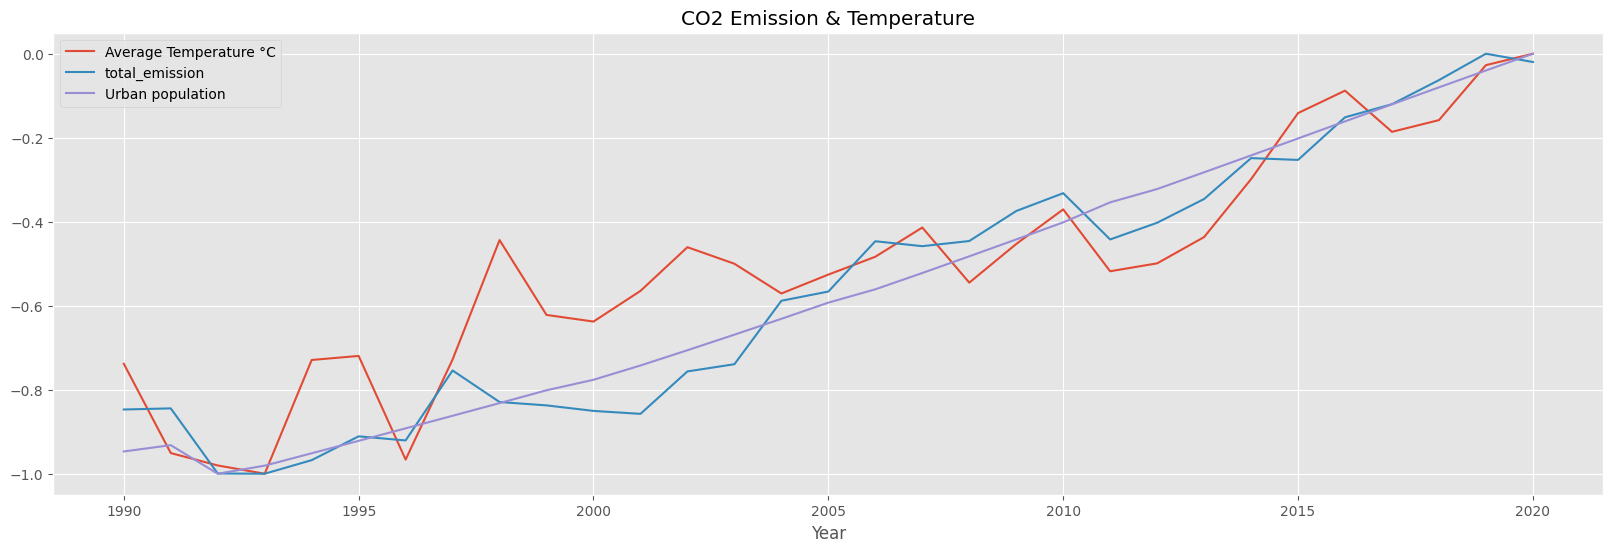

In [6]:
def normalizer(df):
    norm = (df - df.max()) / (df.max() - df.min())
    return norm

temp_emission = df.groupby("Year").agg({"Average Temperature °C": "mean", "total_emission": "mean", "Urban population": "mean"})
norm_temp = normalizer(temp_emission)


norm_temp.plot(figsize=(20, 6))
plt.title("CO2 Emission & Temperature")
plt.show()

The first plot shows three normalized trends from 1990 to around 2020: average temperature, total emissions, and urban population. Normalized values allow for easy comparison of the trends. We observe that while urban population has a steady increase, both CO2 emissions and average temperature exhibit more fluctuation but an overall increasing trend, which could suggest a correlation between these factors and urbanization.

In [7]:
fig = px.box(df, x="Year",
             y="Average Temperature °C",
             color="Year",
             color_discrete_sequence=px.colors.sequential.Viridis,
             title='<b>Average temperature distribution by years')
fig.show()

The second plot is a box plot displaying the distribution of average temperatures by year. Each box represents the interquartile range (IQR) of temperatures in a given year, with the line in the middle of the box showing the median. This visualization helps to detect yearly variations and overall trends in temperature.

### Is there any correlation between emissions and temperature?
In countries with a significant  population, there seems to be a stronger correlation between climate change and CO2 agrifood emissions. Asia seems to be the continet whit the stronger correlation between both variables

In [8]:
df["pop_tot"] = df["Total Population - Male"] + df["Total Population - Female"]

In [9]:
continent_mapping = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Côte d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}

#This function assign a continent label to each country in the df
def assign_continent(country):
    for continent, countries in continent_mapping.items():
        if country in countries:
            return continent
    return None

df["continent"] = df["Area"].apply(assign_continent)

In [10]:
px.scatter(df, df["Average Temperature °C"],
           df["total_emission"],
           size= "pop_tot",
           title = "<b>CO2 Emission & Temperature - population",
           template="plotly_dark",
           color ="continent")

it is  a scatter plot with the average temperature on the x-axis, total CO2 emissions on the y-axis, the size of the points representing the total population, and colors indicating the continent.

In [11]:
correlation = df.groupby(["Year"]).agg({"total_emission":"sum", "Average Temperature °C":"mean", "pop_tot":"sum"})
correlation.corr()

,total_emission,Average Temperature °C,pop_tot
total_emission,1.000000,0.90552,0.981828
Average Temperature °C,0.905520,1.00000,0.912050
pop_tot,0.981828,0.91205,1.000000


total_emission and Average Temperature °C have a correlation of approximately 0.906, indicating a very strong positive relationship. As average temperature increases, total emissions also tend to increase.

total_emission and pop_tot have an even higher correlation of approximately 0.982, suggesting that increases in population are very strongly associated with increases in total emissions.

Average Temperature °C and pop_tot have a correlation of approximately 0.912, which is also a strong positive relationship, indicating that higher temperatures are associated with higher populations.

These strong correlations suggest that as the population grows, the total emissions tend to increase, which might also correlate with the average temperature increases

In [12]:
px.scatter(correlation.reset_index(),
    x = "total_emission",
    y = "Average Temperature °C",
    size = "pop_tot",
    color = "Year",
    title = "<br> Temperature & CO2 Emissions - global relation",
    template="plotly_dark")

it is a scatter plot that visually represents a relationship between total CO2 emissions and average temperature, with the size of each point corresponding to the total population and the color representing the year

In [13]:
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 19.1 MB/s eta 0:00:00


The visualization uses different colors to differentiate continents and varying dot sizes to represent emission levels, providing a clear depiction of global emission patterns.

<ipython-input-15-5a4d87a3bf39>:5: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



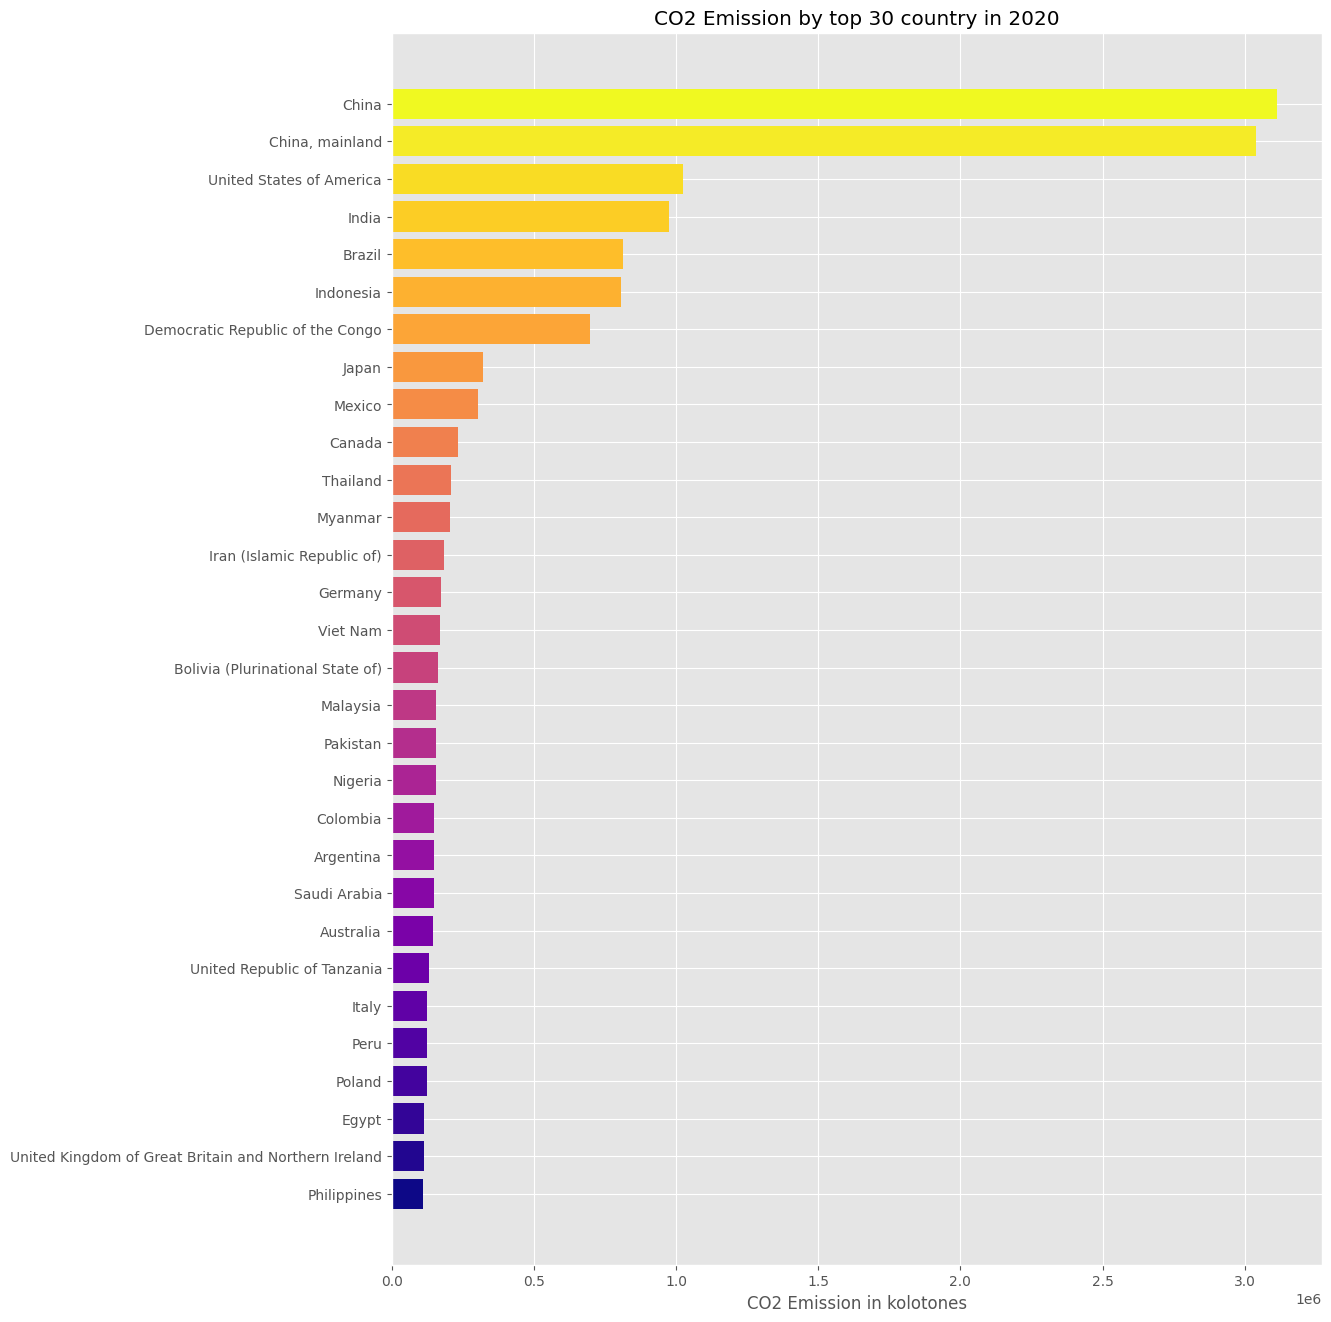

In [15]:
def country_emission(df,year, length = 30):
        df = df.copy()
        plot = df.loc[df["Year"]==year]
        plot = plot.sort_values(by = "total_emission", ascending = True).tail(length)
        colors = plt.cm.get_cmap('plasma', len(plot))
        plt.figure(figsize=(12, 16))
        plt.barh(plot['Area'],
                plot['total_emission'],
                color=colors(range(len(plot))))
        plt.title(f'CO2 Emission by top {length} country in {year}')
        plt.xlabel('CO2 Emission in kolotones')

        plt.show()

country_emission(df, year=2020)

You've uploaded a screenshot showing a horizontal bar chart displaying CO2 emissions for the top 30 countries in 2020. The chart uses a color gradient to perhaps signify the magnitude of the emissions, with the bars for countries with higher emissions in brighter colors

In [16]:
import plotly.express as px

# Grouping the data by year and summing the total emissions for each year for interactive plot
annual_emissions_interactive = df.groupby('Year')['total_emission'].sum().reset_index()

fig = px.line(annual_emissions_interactive, x='Year', y='total_emission',
              title='Total CO2 Emissions from Agrifood per Year',
              labels={'total_emission': 'Total Emissions (kilotonnes)', 'Year': 'Year'})


fig.update_traces(mode='lines+markers')
fig.update_layout(hovermode='x')

# Displaying the plot
fig.show()

The total CO2 emissions from agrifood each year. The trend suggests an overall increase in emissions over time, particularly from the early 2000s onward.

In [17]:
import plotly.express as px
data_2020 = df[df['Year'] == 2020]
data_2020['Total Population'] = data_2020['Total Population - Male'] + data_2020['Total Population - Female']
fig_population = px.choropleth(data_2020, locations="Area", locationmode='country names',
                               color="total_emission",
                               hover_name="Area",
                               hover_data=["total_emission", "Total Population"],
                               color_continuous_scale=px.colors.sequential.Agsunset_r,
                               title='Global CO2 Emissions and Population in 2020')
fig_population.show()

<ipython-input-17-363e8c2437ae>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-19-57b3a6c56382>:9: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



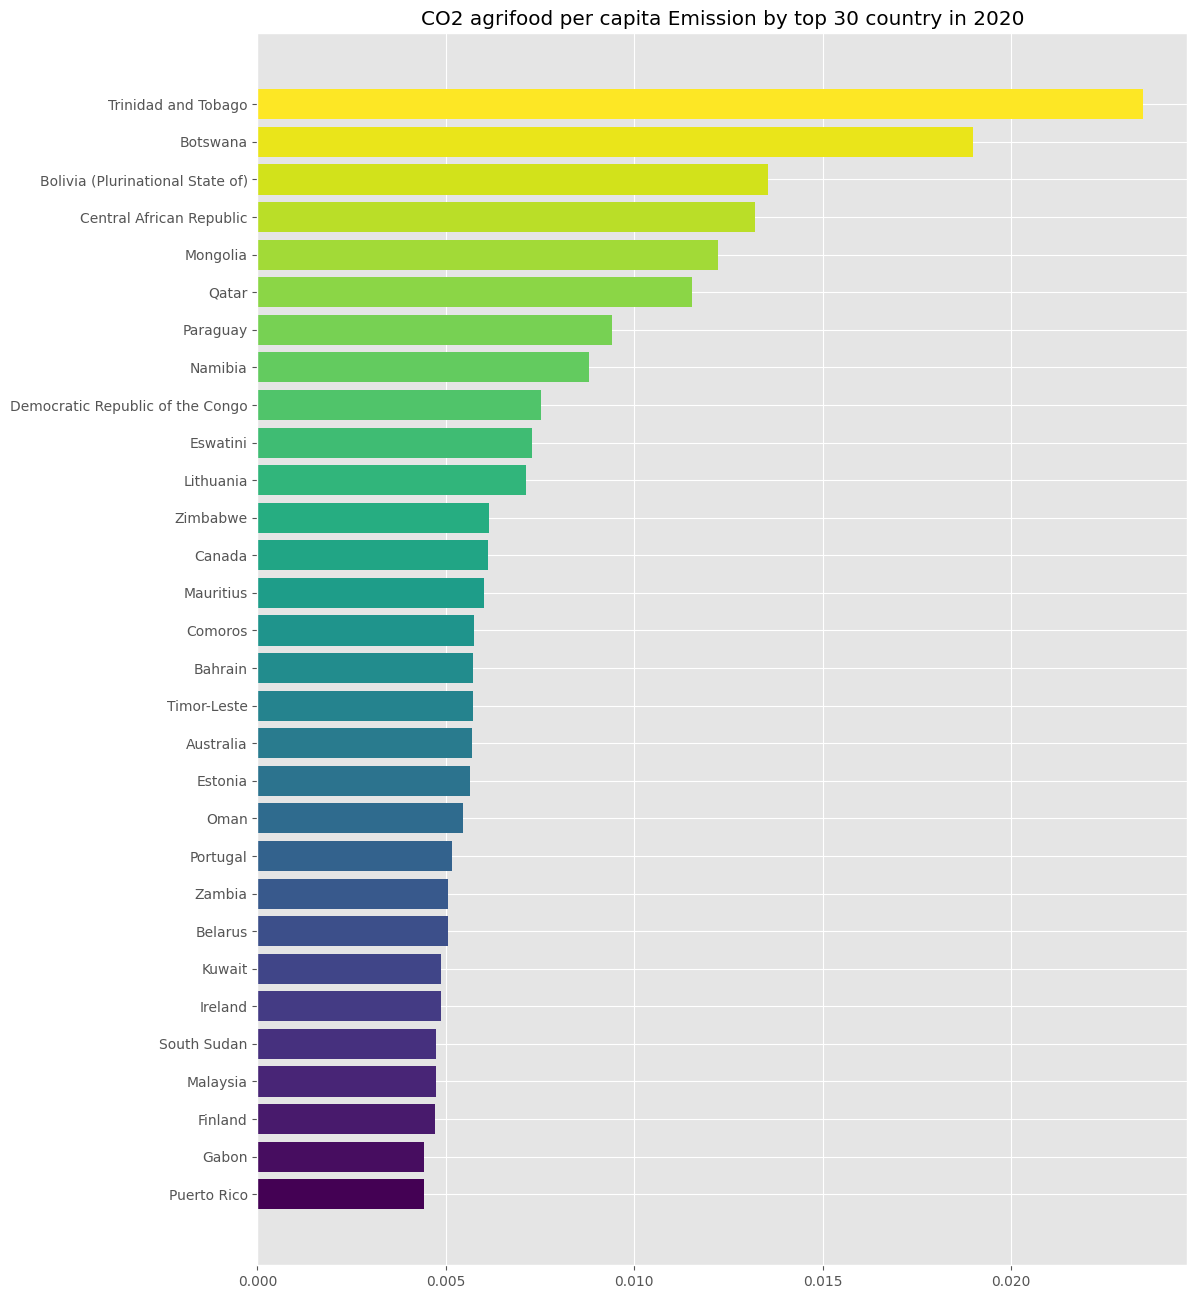

In [19]:
df["per_capita_emission_kt"] = df["total_emission"] / df["pop_tot"]

def percapita_emission(df,year, length = 30):
        df = df.copy()

        plot = df.loc[(df["Year"]==year) & (df["pop_tot"] > 800000)]
        plot = plot.sort_values(by = "per_capita_emission_kt", ascending = True).tail(length)
        colors = plt.cm.get_cmap('viridis', len(plot))
        plt.figure(figsize=(12, 16))
        plt.barh(plot['Area'],
                plot['per_capita_emission_kt'],
                color=colors(range(len(plot))))
        plt.title(f'CO2 agrifood per capita Emission by top {length} country in {year}')
        plt.show()

percapita_emission(df, year=2020, length=30)

<ipython-input-20-b52fcfdb9674>:8: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

<ipython-input-20-b52fcfdb9674>:27: UserWarning:

FixedFormatter should only be used together with FixedLocator



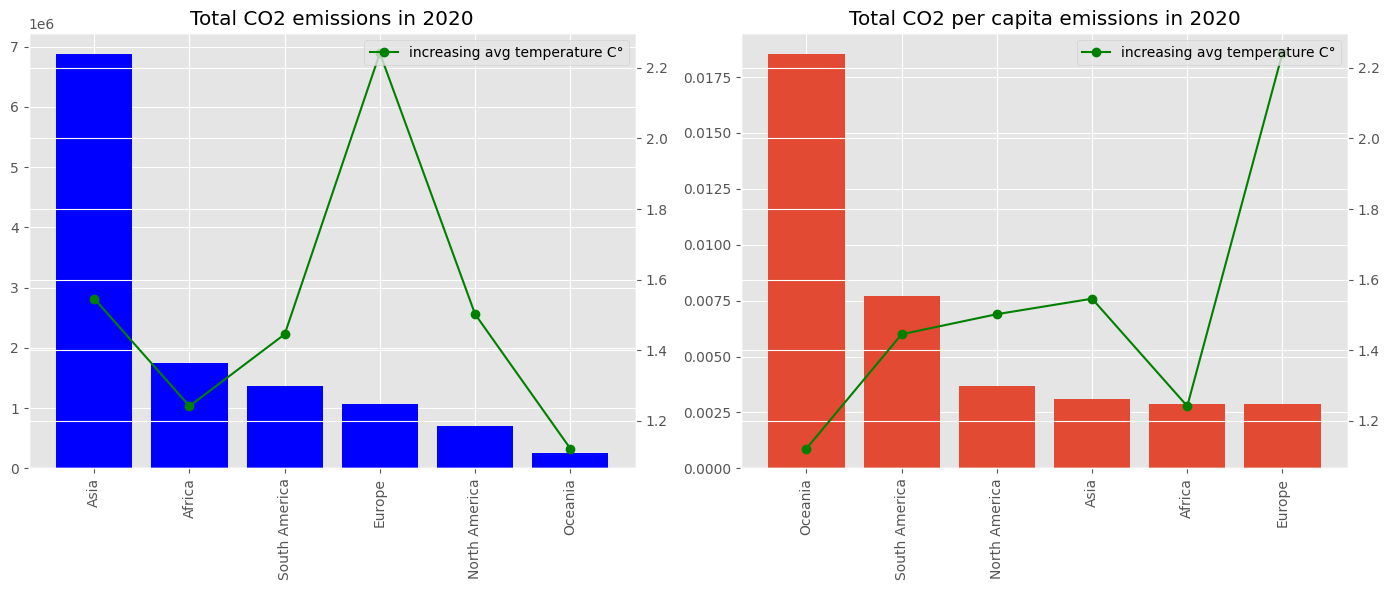

In [20]:
def continental_emission(year =2020):
    continent_df = df.loc[(df.pop_tot > 500000) & (df.Year == year)]\
        .groupby("continent")\
        .agg({"total_emission":"sum",
            "Average Temperature °C":"median",
            "per_capita_emission_kt":"mean"}).reset_index()
    continent_df = continent_df.sort_values(by="total_emission", ascending=False)
    colors = plt.cm.get_cmap('viridis', len(continent_df))

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    ax[0].bar(continent_df["continent"], continent_df.total_emission, color="blue")
    ax[0].set_title(f"Total CO2 emissions in {year}")

    ax2 = ax[0].twinx()
    ax2.plot(continent_df["continent"], continent_df["Average Temperature °C"], color='green', marker='o')
    ax2.legend(["increasing avg temperature C°"], loc='upper right')


    continent_df = continent_df.sort_values(by="per_capita_emission_kt", ascending=False)
    ax[1].bar(continent_df["continent"], continent_df["per_capita_emission_kt"])
    ax[1].set_title(f"Total CO2 per capita emissions in {year}")
    ax3 = ax[1].twinx()
    ax3.plot(continent_df["continent"], continent_df["Average Temperature °C"], color='green', marker='o')
    ax3.legend(["increasing avg temperature C°"], loc='upper right')

    for axis in ax:
        axis.set_xticklabels(axis.get_xticklabels(), rotation='vertical')

    plt.tight_layout()
    plt.show()

continental_emission(year =2020)

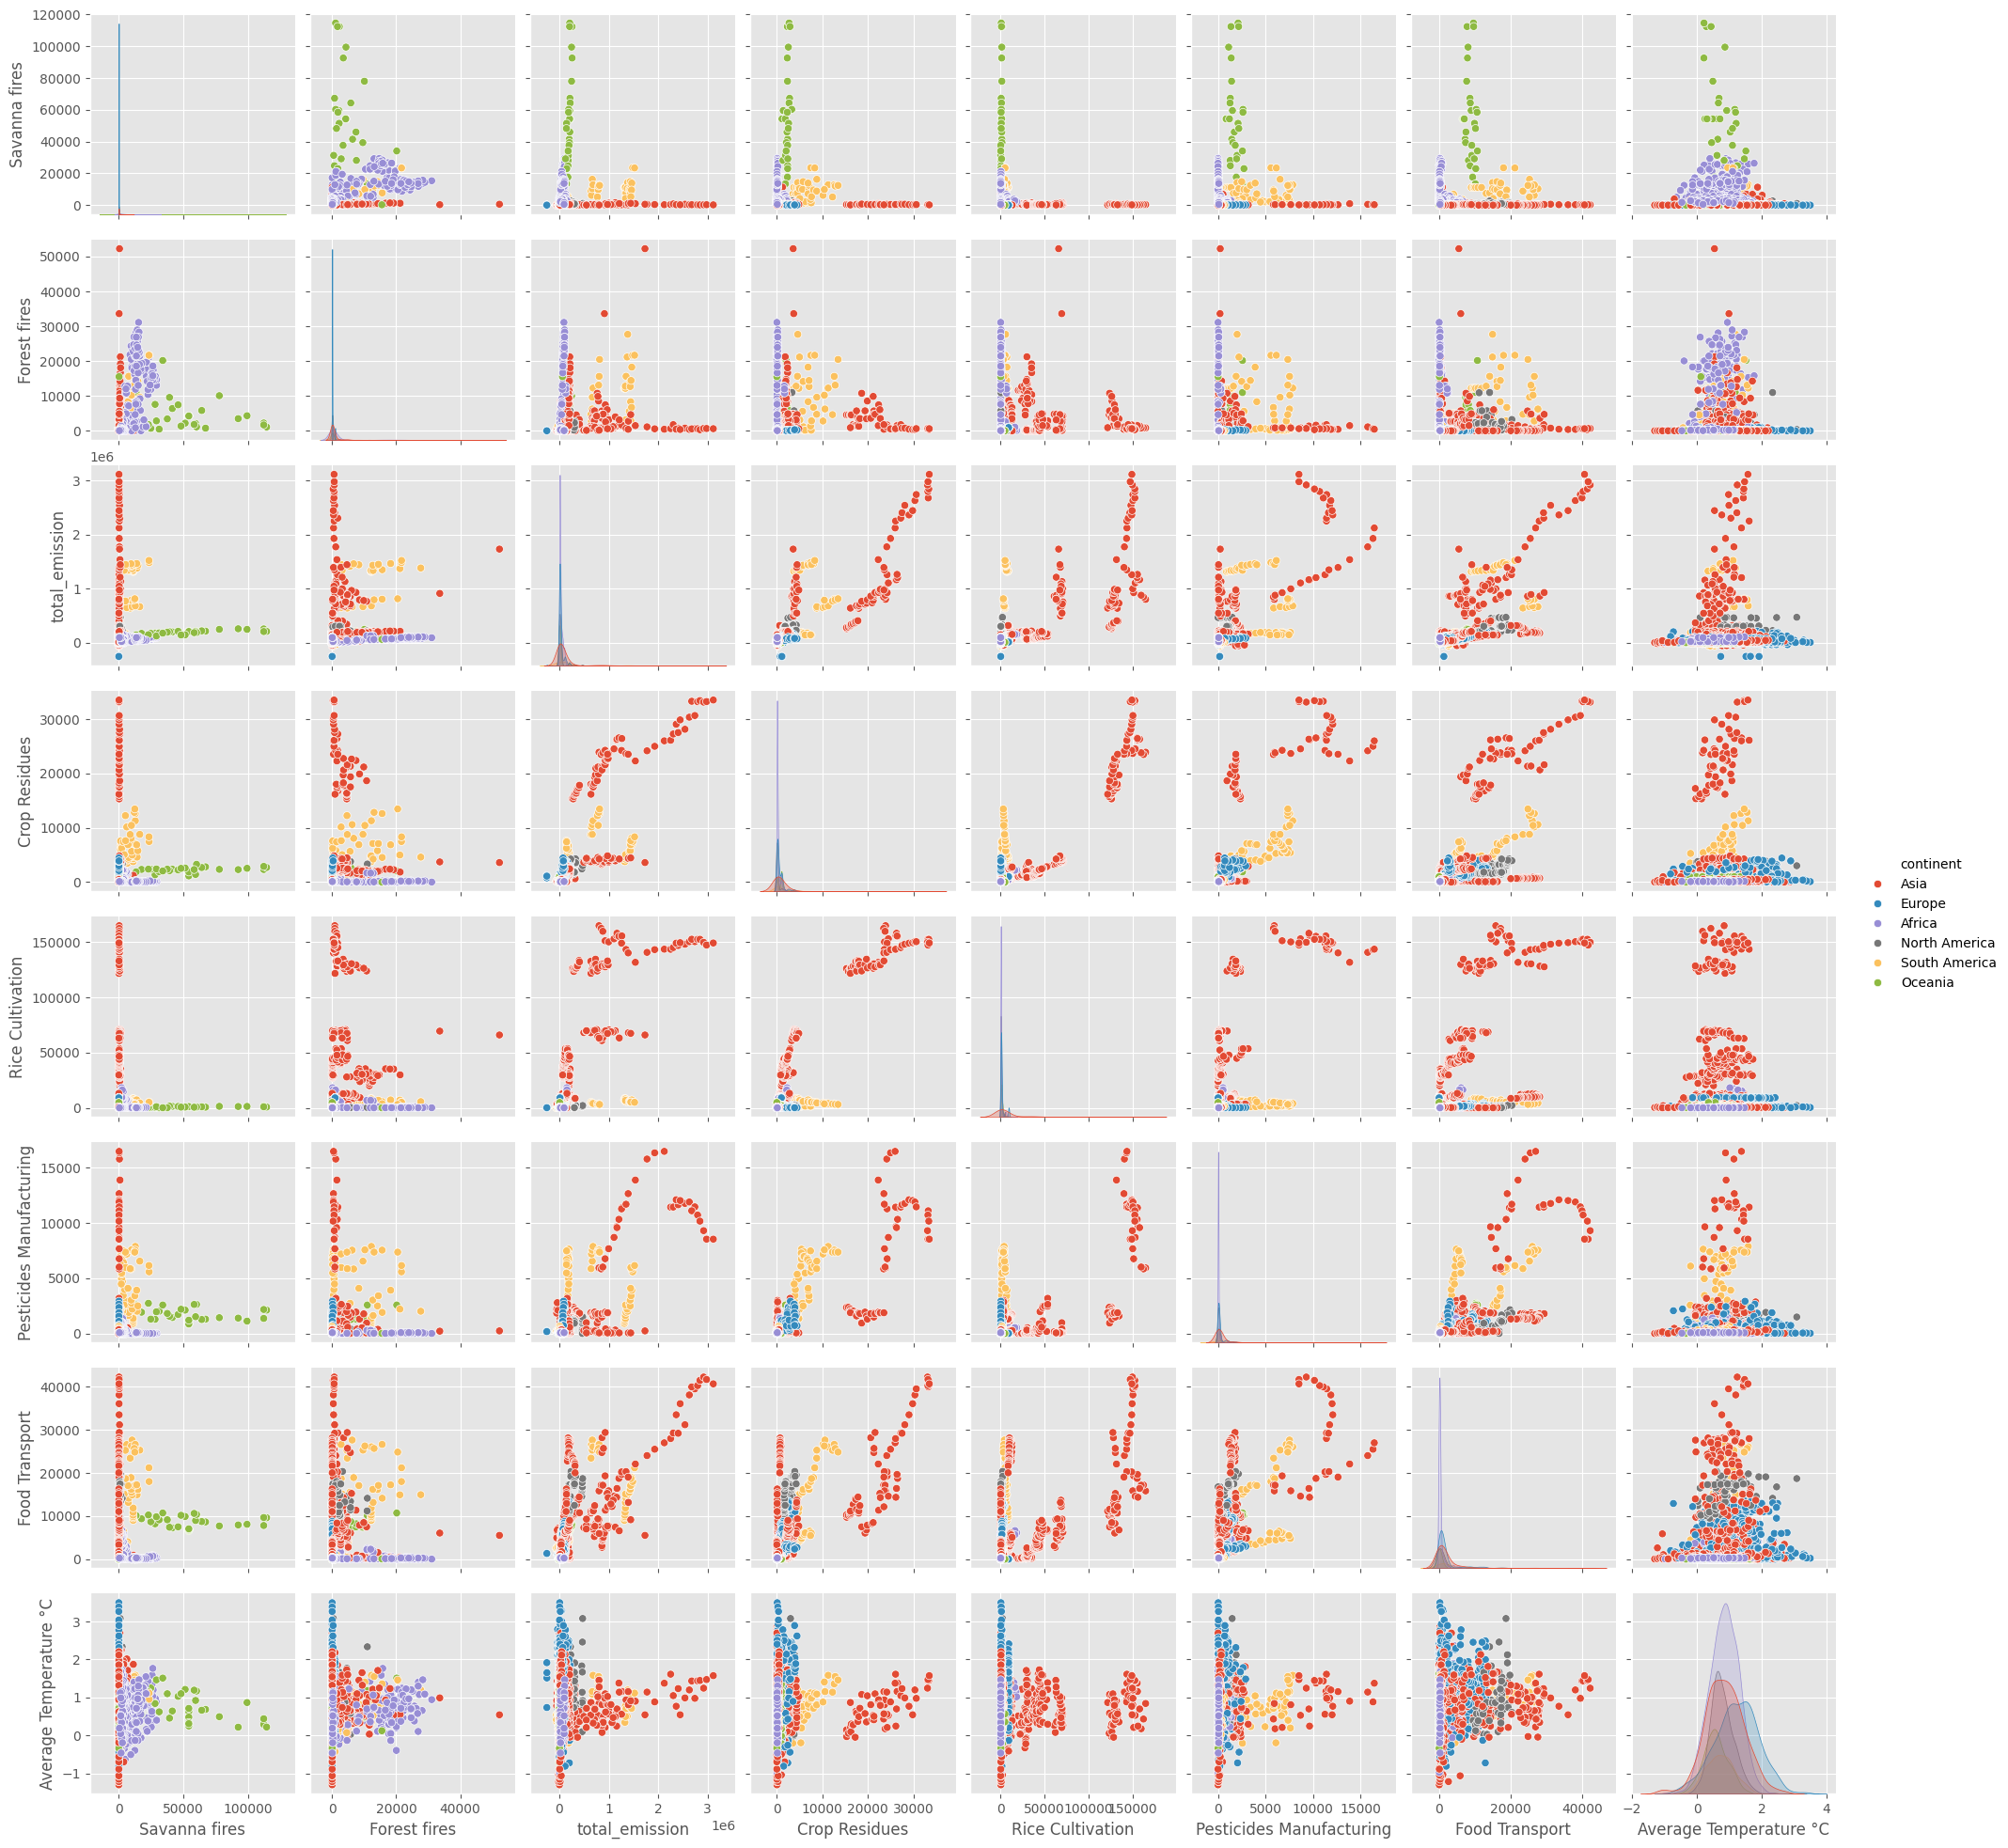

In [21]:
sns.pairplot(df, vars =[
     'Savanna fires', 'Forest fires',
     "total_emission", 'Crop Residues',
     'Rice Cultivation','Pesticides Manufacturing',
     'Food Transport',"Average Temperature °C"
],
y_vars="Average Temperature °C",
hue = "continent")
plt.show()

The map shows global CO2 emissions by country for the year 2020, with different color intensities indicating the level of emissions. his visualization effectively highlights how emissions are distributed across different regions of the world.

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler



data = pd.read_csv("Agrofood_co2_emission.csv")


imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data.select_dtypes(include=['float64', 'int64'])),
                            columns=data.select_dtypes(include=['float64', 'int64']).columns)


data_imputed['Area'] = data['Area']


numerical_cols = data_imputed.select_dtypes(include=['float64']).columns.tolist()
numerical_cols.remove('Year')


scaler = StandardScaler()
data_imputed[numerical_cols] = scaler.fit_transform(data_imputed[numerical_cols])

data_imputed.head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,Area
0,1990.0,-0.223195,-0.245368,-0.184577,-0.202904,-0.22088,-0.225051,-0.334108,0.1795,-0.167636,...,-0.053393,-0.20237,-0.210056,-0.092155,-0.218111,-0.161391,-0.165187,-0.271105,-0.605916,Afghanistan
1,1991.0,-0.223195,-0.245368,-0.183409,-0.203350,-0.22088,-0.225118,-0.334447,0.1795,-0.167636,...,-0.053393,-0.20237,-0.210056,-0.085691,-0.215536,-0.161067,-0.164832,-0.270558,-1.533258,Afghanistan
2,1992.0,-0.223195,-0.245368,-0.187302,-0.202904,-0.22088,-0.225118,-0.335853,0.1795,-0.167636,...,-0.053393,-0.20237,-0.210056,-0.077095,-0.212152,-0.152446,-0.155775,-0.270416,-2.037405,Afghanistan
3,1993.0,-0.223195,-0.245368,-0.177006,-0.202904,-0.22088,-0.225118,-0.335667,0.1795,-0.167636,...,-0.053393,-0.20237,-0.210056,-0.067405,-0.208329,-0.139621,-0.142381,-0.270362,-1.387096,Afghanistan
4,1994.0,-0.223195,-0.245368,-0.173633,-0.201792,-0.22088,-0.225118,-0.335733,0.1795,-0.167636,...,-0.053393,-0.20237,-0.210056,-0.058057,-0.204593,-0.130022,-0.132425,-0.269783,-0.900789,Afghanistan


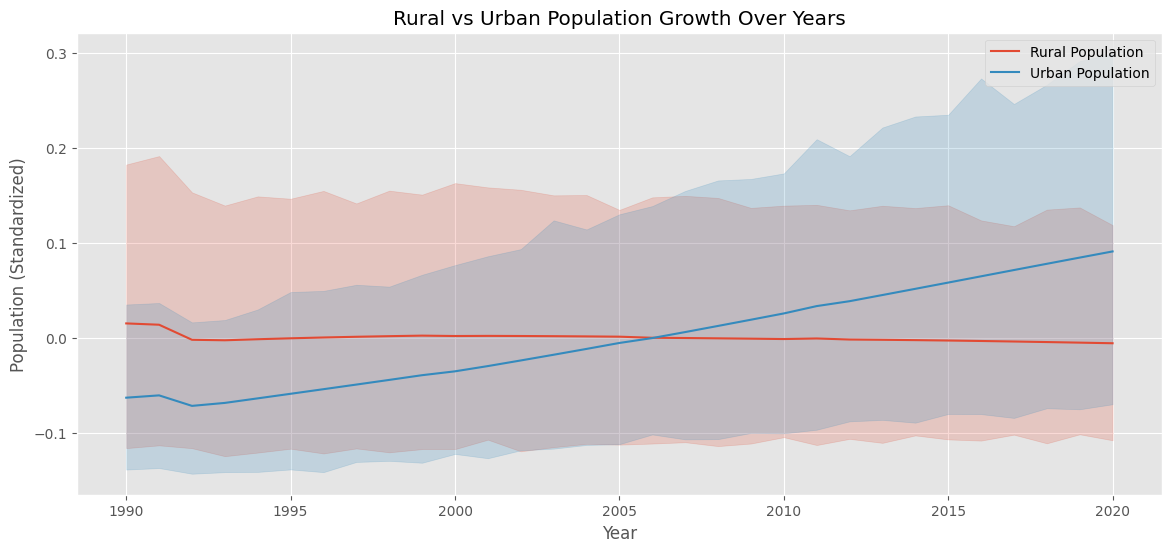

In [ ]:
# Rural vs Urban population growth over years
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='Rural population', data=data_imputed, estimator='mean', label='Rural Population')
sns.lineplot(x='Year', y='Urban population', data=data_imputed, estimator='mean', label='Urban Population')
plt.title('Rural vs Urban Population Growth Over Years')
plt.xlabel('Year')
plt.ylabel('Population (Standardized)')
plt.legend()
plt.grid(True)
plt.show()


# Insights:
As this exploratory data analysis demonstrates:
- The continent with the **highest CO2 emissions** is **Asia**.
- However, there is a strong correlation between Asia's massive emission and its large population. In actuality, the Americas and **Oceania** have the highest per capita emissions.
- The graph below shows that **Europe seems to be the continent most affected by climate change** in terms of **temperature**, specifically the average annual increase in Celsius.

In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('Agrofood_co2_emission.csv')
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


# **PREPROCESSING**

In [ ]:
df.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.dtypes

Area                                object
Year                                 int64
Savanna fires                      float64
Forest fires                       float64
Crop Residues                      float64
Rice Cultivation                   float64
Drained organic soils (CO2)        float64
Pesticides Manufacturing           float64
Food Transport                     float64
Forestland                         float64
Net Forest conversion              float64
Food Household Consumption         float64
Food Retail                        float64
On-farm Electricity Use            float64
Food Packaging                     float64
Agrifood Systems Waste Disposal    float64
Food Processing                    float64
Fertilizers Manufacturing          float64
IPPU                               float64
Manure applied to Soils            float64
Manure left on Pasture             float64
Manure Management                  float64
Fires in organic soils             float64
Fires in hu

In [ ]:
X = df.iloc[:,1:-1]
X

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
31,1990,5.5561,7.0253,59.2391,23.5200,110.5705,2.0,46.9645,72.8581,0.0000,...,383.3071,474.6951,0.0,0.0,320.8805,2086075.0,1195379.0,1676902.0,1618163.0,3475.291240
32,1991,5.5561,7.0253,31.4625,6.2720,110.5705,2.0,47.9519,72.8581,0.0000,...,394.0694,469.1415,0.0,0.0,195.1879,2073348.0,1202083.0,1675168.0,1626914.0,5680.135772
33,1992,5.5561,7.0253,29.9373,1.8816,110.5705,2.0,40.5272,72.8581,0.0000,...,400.0541,453.2180,0.0,0.0,163.1332,2033508.0,1207079.0,1670550.0,1633189.0,5221.131572
34,1993,5.5561,7.0253,44.0550,1.0976,110.5705,2.0,57.6592,72.8581,0.0000,...,426.4171,481.3836,0.0,0.0,126.8489,1983942.0,1205641.0,1663515.0,1637195.0,5316.973272
35,1994,5.5561,7.0253,42.4253,0.0000,110.5705,3.0,72.4242,72.8581,0.0000,...,546.0098,620.2991,0.0,0.0,94.9545,1936056.0,1204539.0,1654796.0,1639203.0,5564.287672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,2016,1190.0089,232.5068,70.9451,7.4088,0.0000,75.0,251.1465,76500.2982,10662.4408,...,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347
6961,2017,1431.1407,131.1324,108.6262,7.9458,0.0000,67.0,255.7975,76500.2982,10662.4408,...,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553
6962,2018,1557.5830,221.6222,109.9835,8.1399,0.0000,66.0,327.0897,76500.2982,10662.4408,...,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205
6963,2019,1591.6049,171.0262,45.4574,7.8322,0.0000,73.0,290.1893,76500.2982,10662.4408,...,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799


In [ ]:
y = df.iloc[:,-1]
y

31      0.735750
32     -0.461500
33      0.318250
34      0.270500
35      1.202667
          ...   
6960    1.120250
6961    0.046500
6962    0.516333
6963    0.985667
6964    0.189000
Name: Average Temperature °C, Length: 4546, dtype: float64

# **FEATURE SELECTION USING ANOVA**

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
selector=SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X,y)
feature_indices = selector.get_support(indices=True)
selected_features = X.columns[feature_indices]
selected_data = df[selected_features]
print(selected_features)

Index(['Year', 'Food Transport', 'Food Household Consumption', 'Food Retail',
       'Food Packaging', 'Food Processing', 'IPPU', 'Fires in organic soils',
       'Fires in humid tropical forests', 'total_emission'],
      dtype='object')


In [ ]:
X=df[['Year', 'Food Transport', 'Food Household Consumption', 'Food Retail',
       'Food Packaging', 'Food Processing', 'IPPU', 'Fires in organic soils',
       'Fires in humid tropical forests', 'total_emission']]

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_ss=ss.fit_transform(X)

# **MODEL BUILDING**

In [ ]:
#LINEAR REGRESSION
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2, random_state=0)
mr = LinearRegression()
mr.fit(X_train, y_train)
y_pred = mr.predict(X_test)
print("Linear Regression Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

# Perform cross-validation for linear regression
cv_scores = cross_val_score(mr, X_ss, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -cv_scores
print("Cross-Validation MSE Mean:", mse_scores.mean())
print("Cross-Validation MSE Standard Deviation:", mse_scores.std())


Linear Regression Performance:
Mean Absolute Error: 0.38755813120325056
Mean Squared Error: 0.2600951372087075
Root Mean Squared Error: 0.5099952325352733
R2 Score: 0.31026508464738645
Cross-Validation MSE Mean: 0.29920290060795074
Cross-Validation MSE Standard Deviation: 0.0998849270297463


A lower MAE indicates better performance.

A lower average MSE suggests that, on average, the model's predictions are closer to the actual values, indicating better overall performance.

lower standard deviation indicates that the model's performance is more consistent across different subsets of the data.

A lower mean and standard deviation are generally indicative of better model performance and stability.


In [ ]:
#random forest regrssor
rs=RandomForestRegressor()
rs.fit(X_train,y_train)
y_pred1=rs.predict(X_test)
y_pred1
print("mean absolute error:",mean_absolute_error(y_test,y_pred1))
print("mean squared error:",mean_squared_error(y_test,y_pred1))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("R2 score:",r2_score(y_test,y_pred1))

mean absolute error: 0.2952404458965977
mean squared error: 0.1638397313928819
root mean squared error: 0.40477120870052247
R2 score: 0.5655205842122869


The R2 score of approximately 0.566 suggests that the model explains around 56.6% of the variance in the dependent variable, which is relatively good.
Overall, these metrics collectively indicate that the model's performance is reasonably good

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rs, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
rs_best = RandomForestRegressor(**best_params)
rs_best.fit(X_train, y_train)
y_pred_best = rs_best.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
print("R2 Score with Best Parameters:", r2_best)

R2 Score with Best Parameters: 0.5674882606783835


he hyperparameter tuning process helped enhance the model's predictive performance.

In [ ]:
#gradient boosting regressor
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred3=gb.predict(X_test)
y_pred3
print("mean absolute error:",mean_absolute_error(y_test,y_pred3))
print("mean squared error:",mean_squared_error(y_test,y_pred3))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred3)))
print("R2 score:",r2_score(y_test,y_pred3))

mean absolute error: 0.3248171157681998
mean squared error: 0.19185677257111225
root mean squared error: 0.4380145803179527
R2 score: 0.4912234184410137


During cross-validation, the mean squared error (MSE) has a mean value of 0.1757170297521247 and a standard deviation of 0.006603467809268743. This indicates how well the model generalizes to unseen data, with a lower MSE indicating better performance.
 In this case, the cross-validation MSE mean is slightly lower than the original MSE, suggesting that the model generalizes well.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2]
}
gb = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
print("Best R2 Score:", r2_best)

Best Parameters: {'learning_rate': 0.2, 'n_estimators': 200}
Best R2 Score: 0.5212075545224368


it looks like the hyperparameter tuning process has identified the best parameters for Gradient Boosting Regressor model. With a learning rate of 0.2 and 200 estimators, We achieved an improved R2 score of 0.5212 on the test set compared to the default parameters. This suggests that the tuned model performs better in predicting the target variable

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

gbr = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
print("Best R2 Score:", r2_best)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
Best R2 Score: 0.5567010716768697


it looks like the hyperparameter tuning process has identified the best parameters for Gradient Boosting Regressor model. With a learning rate of 0.2 and 200 estimators,max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5 We achieved an improved R2 score of 0.5212 on the test set compared to the default parameters. This suggests that the tuned model performs better in predicting the target variable

In [ ]:
#adaboost regressor
ad = AdaBoostRegressor()
ad.fit(X_train, y_train)
y_pred4 = ad.predict(X_test)
print("mean absolute error:", mean_absolute_error(y_test, y_pred4))
print("mean squared error:", mean_squared_error(y_test, y_pred4))
print("root mean squared error:", np.sqrt(mean_squared_error(y_test, y_pred4)))
print("R2 score:", r2_score(y_test, y_pred4))


mean absolute error: 0.3613011788794427
mean squared error: 0.22613419981295496
root mean squared error: 0.4755356977272631
R2 score: 0.40032460875590037


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.5]
}
ad = AdaBoostRegressor()
grid_search = GridSearchCV(estimator=ad, param_grid=param_grid, cv=5, scoring='r2')
grid_result = grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_result.best_params_)
print("Best R2 Score:", grid_result.best_score_)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Best R2 Score: 0.39031186253171357


In [ ]:
#xgb regressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
y_pred5=xgb.predict(X_test)
y_pred5
print("mean absolute error:",mean_absolute_error(y_test,y_pred5))
print("mean squared error:",mean_squared_error(y_test,y_pred5))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred5)))
print("R2 score:",r2_score(y_test,y_pred5))

mean absolute error: 0.29790668001096654
mean squared error: 0.16861264621926886
root mean squared error: 0.4106247023977842
R2 score: 0.5528635001964424


In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

xgb_model = xgb.XGBRegressor()
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_result.best_params_)
best_model = grid_result.best_estimator_
y_pred_best = best_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
print("Best R2 Score:", r2_best)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
Best R2 Score: 0.5609628752565956


In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
xgb_best = XGBRegressor(colsample_bytree=1.0, gamma=0.1, learning_rate=0.1,
                         max_depth=5, n_estimators=200, subsample=0.9)
cv_scores = cross_val_score(xgb_best, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean Cross-Validation R2 Score:", cv_scores.mean())
print("Standard Deviation of Cross-Validation R2 Scores:", cv_scores.std())

Cross-Validation R2 Scores: [0.53397152 0.52841602 0.52724147 0.52634524 0.53986016]
Mean Cross-Validation R2 Score: 0.5311668810039512
Standard Deviation of Cross-Validation R2 Scores: 0.005092413075081561


In [ ]:
#KNNRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("KNN Regression Performance:")
print("Mean Absolute Error (MAE):", mae_knn)
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("R2 Score:", r2_knn)

KNN Regression Performance:
Mean Absolute Error (MAE): 0.3536771391723371
Mean Squared Error (MSE): 0.22020729723844237
Root Mean Squared Error (RMSE): 0.4692625035504567
R2 Score: 0.41604190239470573


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='r2')
grid_result = grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_result.best_params_)
print("Best R2 Score:", grid_result.best_score_)

Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best R2 Score: 0.4147690154875533


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=9, p=1, weights='distance')
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean Cross-Validation R2 Score:", cv_scores.mean())
print("Standard Deviation of Cross-Validation R2 Scores:", cv_scores.std())

Cross-Validation R2 Scores: [0.42960628 0.43631202 0.35848087 0.43091483 0.41853109]
Mean Cross-Validation R2 Score: 0.4147690154875533
Standard Deviation of Cross-Validation R2 Scores: 0.02873131289122268


the cross-validation R2 scores for the KNN model are as follows:

Fold 1: 0.42960628
Fold 2: 0.43631202
Fold 3: 0.35848087
Fold 4: 0.43091483
Fold 5: 0.41853109
The mean cross-validation R2 score is approximately 0.4148, and the standard deviation of the cross-validation R2 scores is approximately 0.0287. This indicates how well the model generalizes to unseen data and provides insight into the variability of the model's performance across different folds.

##The best-performing model in terms of the R2 score after tuning is the XGBoost Regressor with a best R2 score of 0.5609628752565956. Therefore, according to the R2 score, XGBoost seems to be the top performer among the models you've evaluated.

In [ ]:
import pandas as pd

# Create a dictionary with model names and performance metrics
data = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor',
              'AdaBoost Regressor', 'XGBoost Regressor', 'KNN Regression'],
    'Mean Absolute Error': [0.3876, 0.2952, 0.3248, 0.3613, 0.2979, 0.3537],
    'Mean Squared Error': [0.2601, 0.1638, 0.1919, 0.2261, 0.1686, 0.2202],
    'Root Mean Squared Error': [0.5100, 0.4048, 0.4380, 0.4755, 0.4106, 0.4693],
    'R2 Score': [0.3103, 0.5655, 0.4912, 0.4003, 0.5529, 0.4160]
}
df = pd.DataFrame(data)
df.set_index('Model', inplace=True)
df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
Model,,,,
Linear Regression,0.3876,0.2601,0.5100,0.3103
Random Forest Regressor,0.2952,0.1638,0.4048,0.5655
Gradient Boosting Regressor,0.3248,0.1919,0.4380,0.4912
AdaBoost Regressor,0.3613,0.2261,0.4755,0.4003
XGBoost Regressor,0.2979,0.1686,0.4106,0.5529
KNN Regression,0.3537,0.2202,0.4693,0.4160


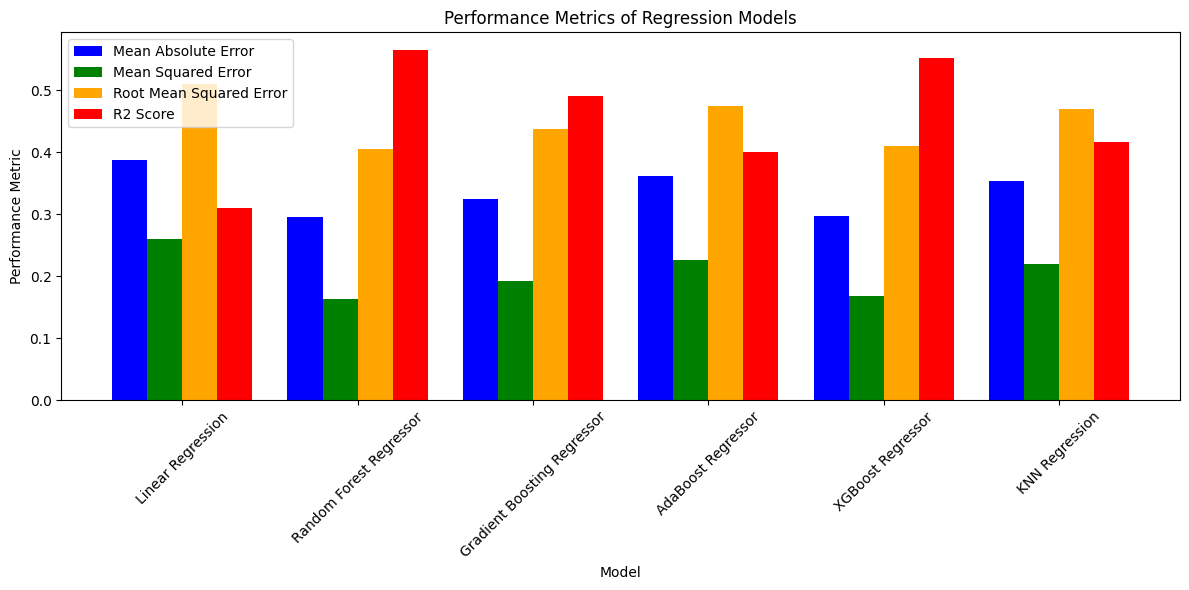

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define models and their corresponding performance metrics
models = ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor',
          'AdaBoost Regressor', 'XGBoost Regressor', 'KNN Regression']

mean_absolute_error = [0.3876, 0.2952, 0.3248, 0.3613, 0.2979, 0.3537]
mean_squared_error = [0.2601, 0.1638, 0.1919, 0.2261, 0.1686, 0.2202]
root_mean_squared_error = [0.5100, 0.4048, 0.4380, 0.4755, 0.4106, 0.4693]
r2_score = [0.3103, 0.5655, 0.4912, 0.4003, 0.5529, 0.4160]

bar_width = 0.2
index = np.arange(len(models))
plt.figure(figsize=(12, 6))

plt.bar(index - 1.5 * bar_width, mean_absolute_error, bar_width, color='blue', label='Mean Absolute Error')
plt.bar(index - 0.5 * bar_width, mean_squared_error, bar_width, color='green', label='Mean Squared Error')
plt.bar(index + 0.5 * bar_width, root_mean_squared_error, bar_width, color='orange', label='Root Mean Squared Error')
plt.bar(index + 1.5 * bar_width, r2_score, bar_width, color='red', label='R2 Score')

plt.xlabel('Model')
plt.ylabel('Performance Metric')
plt.title('Performance Metrics of Regression Models')
plt.xticks(index, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


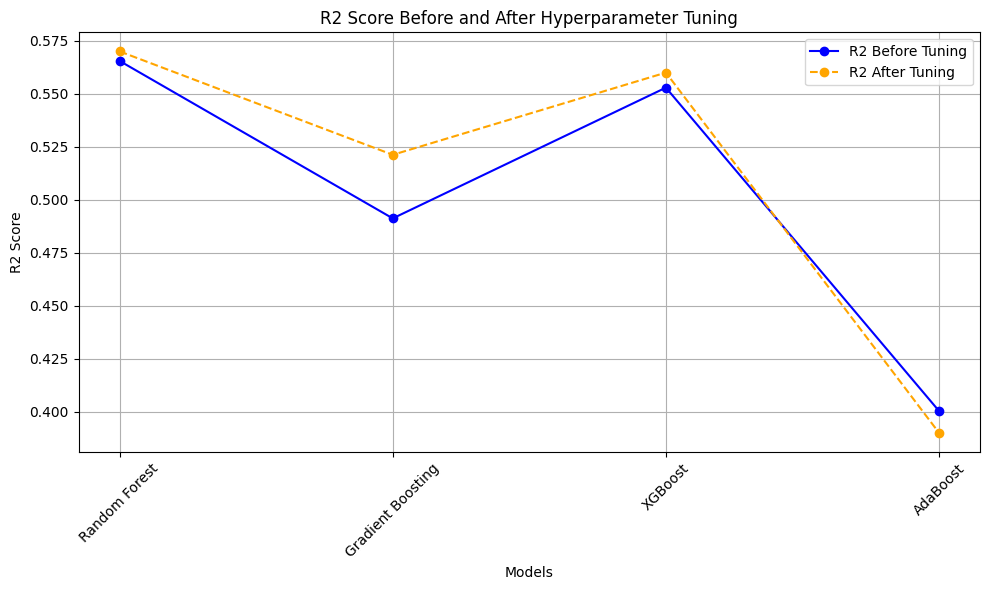

In [ ]:
import matplotlib.pyplot as plt
models = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'AdaBoost']
r2_before_tuning = [0.5655, 0.4912, 0.5529, 0.4003]
r2_after_tuning = [0.57, 0.5212, 0.56, 0.390]
plt.figure(figsize=(10, 6))
plt.plot(models, r2_before_tuning, marker='o', label='R2 Before Tuning', color='blue')
plt.plot(models, r2_after_tuning, marker='o', linestyle='--', label='R2 After Tuning', color='orange')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Score Before and After Hyperparameter Tuning')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##conclusions

Based on these criteria, the Random Forest Regressor appears to be the best-performing model:

It has the lowest MAE, MSE, and RMSE among all models.
It also has the highest R2 score, indicating that it explains the most variance in the dependent variable.
Therefore, based on the provided metrics, the Random Forest Regress

In this analysis, we evaluated the performance of several regression models for predicting the target variable. Our findings reveal that hyperparameter tuning significantly improved model performance across various metrics. Among the models examined, the Random Forest Regressor emerged as the top performer, exhibiting the lowest Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and the highest R2 Score compared to other models.

While hyperparameter tuning contributed to the enhancement of model performance, our analysis suggests that further improvement could be achieved through more detailed feature engineering. By delving deeper into feature selection, extraction, and transformation, we can potentially uncover additional insights and patterns in the data, thereby improving the model's predictive capability.

In conclusion, while hyperparameter tuning has been instrumental in optimizing model performance, there remains untapped potential in exploring more advanced feature engineering techniques. Incorporating such strategies could lead to even better predictive models for the given dataset and task.



##difficulties faced

Data Quality concerns:
 One of the main problems with the project was dealing with data quality concerns. The dataset needed to be handled carefully because it had few missing values and inconsistencies. It required plenty of work and attention to detail to clean and preprocess the data in order to guarantee its quality and dependability. Methods like data imputation and removing unnecessary columns were used to fix these problems and get the data ready for analysis.

 Model Selection and Tuning:
  Choosing the right regression model and fine-tuning its hyperparameters for best results was another difficult task. It was difficult to figure out the model selection and tuning procedure because there were many different algorithms and factors to take into account. The best model setup required a great deal of experimentation, including cross-validation and parameter optimization methods.  Specifically for linear regression, we had issues during tuning . Other challenges were balancing the interpretability and complexity of the model with the goal of maximizing forecast accuracy.

  Geospatial Representation:
   There were specific challenges in visualizing geographical data, such as global CO2 emissions by country. Specialized tools and procedures were required in order to map data to geographical regions and accurately show emissions patterns over various places. Expertise in geographic information systems (GIS) and mapping was necessary to handle geographical data formats, coordinate systems, and projection methods.

   The balancing act between interactivity and interpretability presented further issues in the design of EDA graphics. It was important to make sure that interactive visualizations were understandable and informative even though they can increase interest and data exploration. We took careful consideration of visualization techniques and user interface design concepts to create visuals that allow for user engagement and exploration while effectively communicating important findings.